# GLOBAL TERRORISM REPORT
***
Analysed by: **Mohammad Zaid Shaikh**
## 1. File Cleaning
### Import libraries and read file data .csv

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read data to a dataframe
data = pd.read_csv('globalterrorismdb_0718dist.csv', low_memory=False)

### Check and keep required columns for our analysis

In [3]:
#Check for general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
#change the some columns names
data.rename(columns={'iyear': 'Year', 'country_txt': 'Country', 'natlty1_txt': 'nationality_of_target',
                'nkill': 'Killed', 'nwound': 'Wounded', 'attacktype1_txt':'Attacktype'}, inplace=True)


In [5]:
#choose columns
data = data[['Year','Country','nationality_of_target','Killed','Wounded','Attacktype']]

In [6]:
#Check for general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   181691 non-null  int64  
 1   Country                181691 non-null  object 
 2   nationality_of_target  180132 non-null  object 
 3   Killed                 171378 non-null  float64
 4   Wounded                165380 non-null  float64
 5   Attacktype             181691 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 8.3+ MB


In [7]:
#describe data
data.describe(include='all')

,Year,Country,nationality_of_target,Killed,Wounded,Attacktype
count,181691.000000,181691,180132,171378.000000,165380.000000,181691
unique,NaN,205,215,NaN,NaN,9
top,NaN,Iraq,Iraq,NaN,NaN,Bombing/Explosion
freq,NaN,24636,24113,NaN,NaN,88255
mean,2002.638997,NaN,NaN,2.403272,3.167668,NaN
std,13.259430,NaN,NaN,11.545741,35.949392,NaN
min,1970.000000,NaN,NaN,0.000000,0.000000,NaN
25%,1991.000000,NaN,NaN,0.000000,0.000000,NaN
50%,2009.000000,NaN,NaN,0.000000,0.000000,NaN
75%,2014.000000,NaN,NaN,2.000000,2.000000,NaN


## 2. Data analysis of Global Terrorism from 1970 to 2017
### 1) Number of Attacks and Number of Casualties (Dead and Injured) From 1970 to 2017

In [8]:
casualties_year = data[["Year","Killed","Wounded"]].groupby('Year', as_index = False).sum()
casualties_year.head()

,Year,Killed,Wounded
0,1970,174.0,212.0
1,1971,173.0,82.0
2,1972,566.0,409.0
3,1973,370.0,495.0
4,1974,539.0,865.0


In [9]:
attack_year = data["Year"].value_counts().to_frame().sort_index(axis = 0)
attack_year = data["Year"].value_counts().to_frame().sort_index(axis = 0)
attack_year.reset_index(inplace=True)
attack_year.columns = ['Year', 'Incidents']
attack_year.head()

,Year,Incidents
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


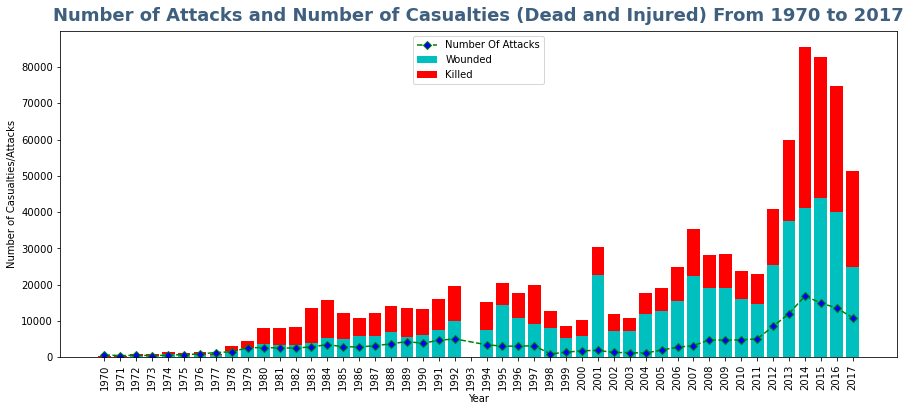

In [10]:
fig, ax1 = plt.subplots(figsize = (15,6))
plt.bar(casualties_year["Year"], casualties_year["Wounded"], color="c", label='Wounded')
plt.bar(casualties_year["Year"], casualties_year["Killed"], color="r", bottom=casualties_year["Wounded"], label='Killed')
plt.xticks(np.arange(1970, 2018, step=1),rotation=90)
ax1.set_ylabel('Number of Casualties/Attacks', size = 10)
ax1.set_xlabel('Year', size = 10)
ax1.set_title('Number of Attacks and Number of Casualties (Dead and Injured) From 1970 to 2017', fontsize= 18, pad= 10, weight ='bold',color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

#draw plot chart
ax1.plot(attack_year['Year'], attack_year['Incidents'], 'g--D', mfc='b', label='Number Of Attacks')
ax1.legend(loc='upper center')
plt.show()

### 2) Top 20 Countries by Number of Attacks and Number of Casualties from 1970 To 2017

In [11]:
#Choose comlumn Country and Damage from data
country_attack = data["Country"].value_counts().to_frame().sort_values("Country", ascending = False).head(20)
country_attack.reset_index(inplace=True)
country_attack.columns = ['Country', 'Incidents']

In [12]:
casualties_country = data[["Country","Killed","Wounded"]].groupby('Country', as_index = False).sum()
casualties_country["Total Casuality"] = casualties_country['Killed'] + casualties_country['Wounded']
casualties_country = casualties_country.sort_values("Total Casuality", ascending = False).head(20)
attack_country = data["Country"].value_counts().to_frame().sort_index(axis = 0)
attack_country.reset_index(inplace=True)
attack_country.columns = ['Country', 'Incidents']
casualties_country = pd.merge(casualties_country, attack_country, on='Country')
attack_country = attack_country.sort_values("Incidents", ascending = False).head(20)
casualties_country

,Country,Killed,Wounded,Total Casuality,Incidents
0,Iraq,78589.0,134690.0,213279.0,24636
1,Afghanistan,39384.0,44277.0,83661.0,12731
2,Pakistan,23822.0,42038.0,65860.0,14368
3,India,19341.0,28980.0,48321.0,11960
4,Nigeria,22682.0,10239.0,32921.0,3907
5,Sri Lanka,15530.0,15561.0,31091.0,3022
6,Syria,15229.0,14109.0,29338.0,2201
7,Colombia,14698.0,10328.0,25026.0,8306
8,United States,3771.0,20702.0,24473.0,2836
9,Philippines,9559.0,13367.0,22926.0,6908


#### i) Top 20 Terrorist incidents by Country From 1970 To 2017

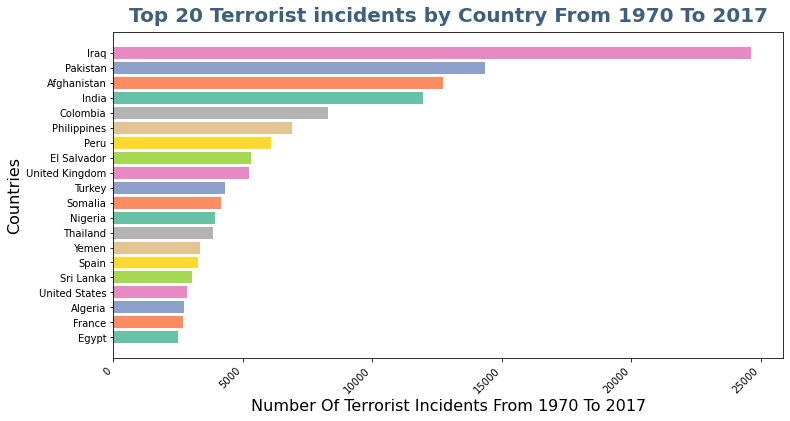

In [13]:
#Paint the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(attack_country['Country'][::-1], attack_country['Incidents'][::-1], color = sns.color_palette("Set2", 8))
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Terrorist Incidents From 1970 To 2017', size=16)
plt.title("Top 20 Terrorist incidents by Country From 1970 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

#### ii) Top 20 Deaths by Country from terrorist incidents From 1970 To 2017

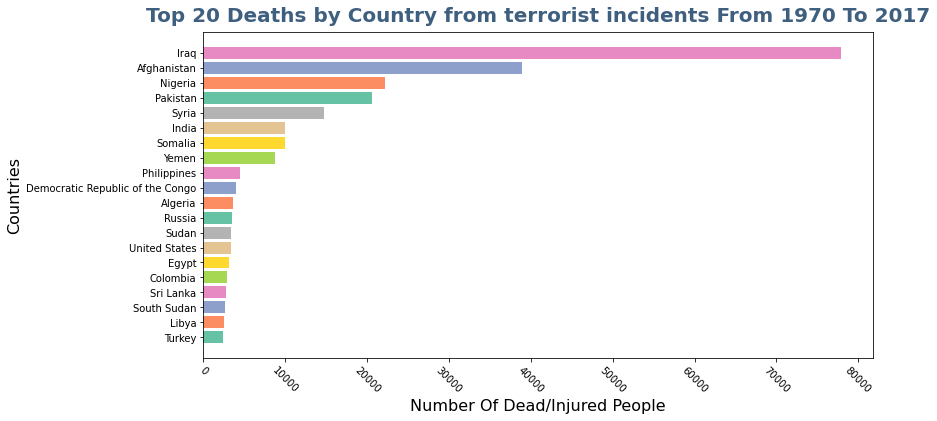

In [14]:
#Choose comlumn Country and Damage from data
country_damage = data[data['Year'] > 1999][["Country", "Killed"]].groupby('Country',as_index=False).sum()
data_paint = country_damage.sort_values(by='Killed', ascending = False).head(20)

#Paint the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(data_paint["Country"][::-1], data_paint["Killed"][::-1], color = sns.color_palette("Set2", 8))
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 20 Deaths by Country from terrorist incidents From 1970 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

#### iii)Top 20 Countries by Number of Attacks and Number of Casualties (Killed and Wounded)

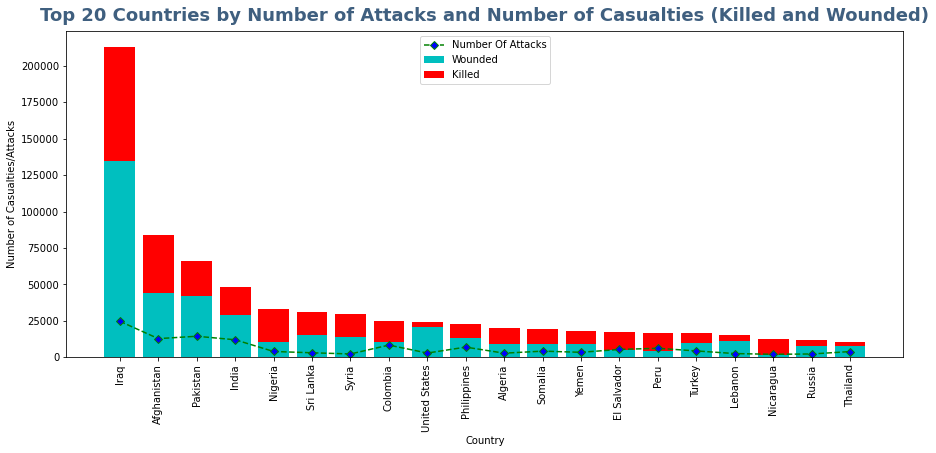

In [15]:
fig, ax1 = plt.subplots(figsize = (15,6))
plt.bar(casualties_country["Country"], casualties_country["Wounded"], color="c", label='Wounded')
plt.bar(casualties_country["Country"], casualties_country["Killed"], color="r", bottom=casualties_country["Wounded"], label='Killed')
plt.xticks(rotation=90)
ax1.set_ylabel('Number of Casualties/Attacks', size = 10)
ax1.set_xlabel('Country', size = 10)
ax1.set_title('Top 20 Countries by Number of Attacks and Number of Casualties (Killed and Wounded)', fontsize= 18, pad= 10, weight ='bold',color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

#draw plot chart
ax1.plot(casualties_country['Country'], casualties_country['Incidents'], 'g--D', mfc='b', label='Number Of Attacks')

ax1.legend(loc='upper center')
plt.show()

### 3) Top 20 Target Nationalities From 1970 To 2017

In [16]:
target_nationalities = data[['nationality_of_target', 'Killed']].groupby('nationality_of_target', as_index = False).sum()
target_nationalities = target_nationalities.sort_values("Killed", ascending = False).head(20)
target_nationalities

,nationality_of_target,Killed
86,Iraq,77057.0
0,Afghanistan,35934.0
141,Pakistan,23152.0
135,Nigeria,22460.0
82,India,20041.0
184,Syria,15096.0
175,Sri Lanka,14728.0
36,Colombia,14585.0
146,Peru,12691.0
54,El Salvador,11982.0


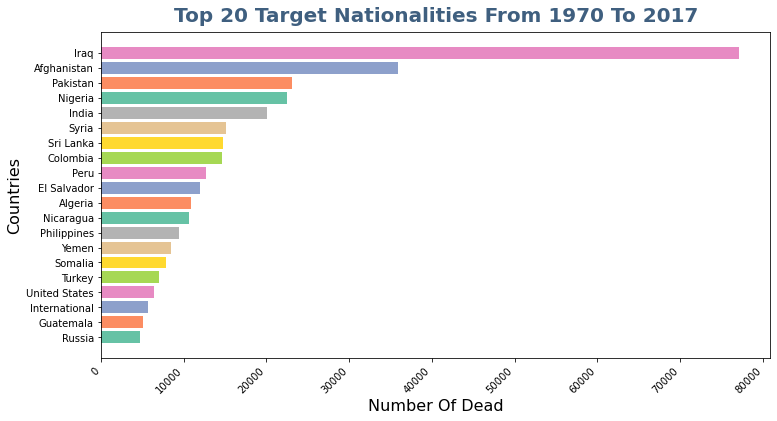

In [17]:
#Paint the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(target_nationalities['nationality_of_target'][::-1], target_nationalities['Killed'][::-1], color = sns.color_palette("Set2", 8))
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead', size=16)
plt.title("Top 20 Target Nationalities From 1970 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

### 4) Types of Terror Attacks

In [18]:
attacktype = data["Attacktype"].value_counts().to_frame().sort_index(axis = 0)
attacktype

,Attacktype
Armed Assault,42669
Assassination,19312
Bombing/Explosion,88255
Facility/Infrastructure Attack,10356
Hijacking,659
Hostage Taking (Barricade Incident),991
Hostage Taking (Kidnapping),11158
Unarmed Assault,1015
Unknown,7276


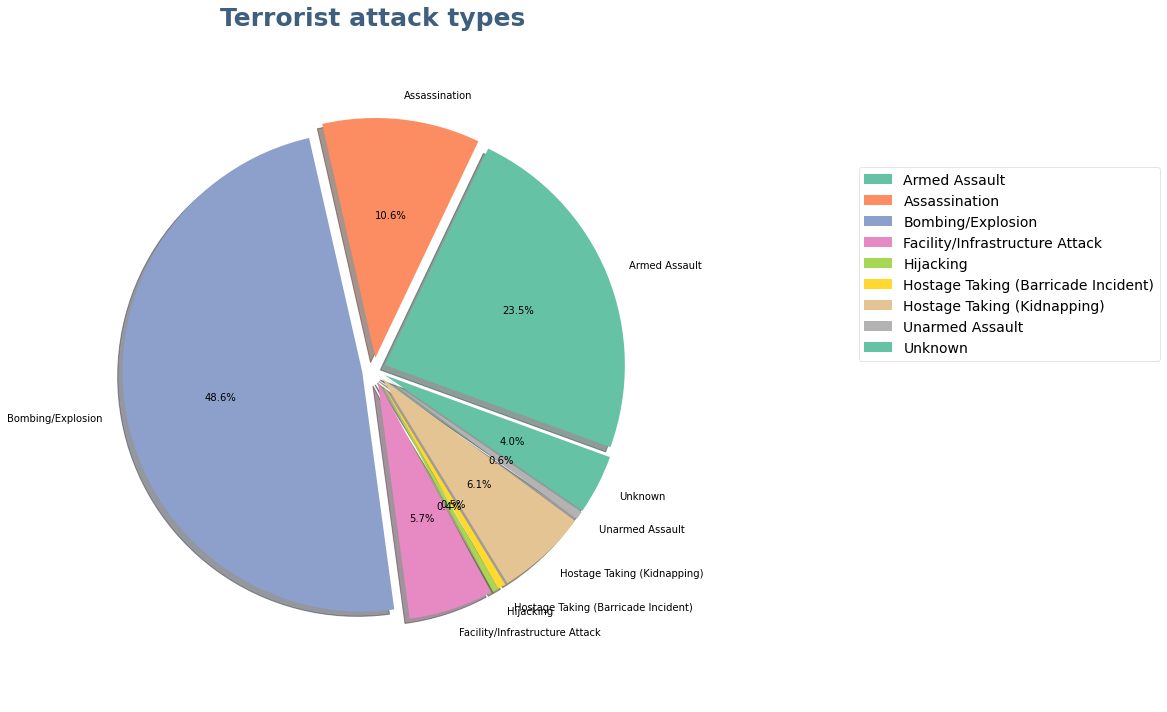

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
plt.pie([i[0] for i in attacktype.values], labels=attacktype.index, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = np.full(9, 0.05),
        colors = sns.color_palette("Set2", 8))
ax.axis('equal')
plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})
plt.show()

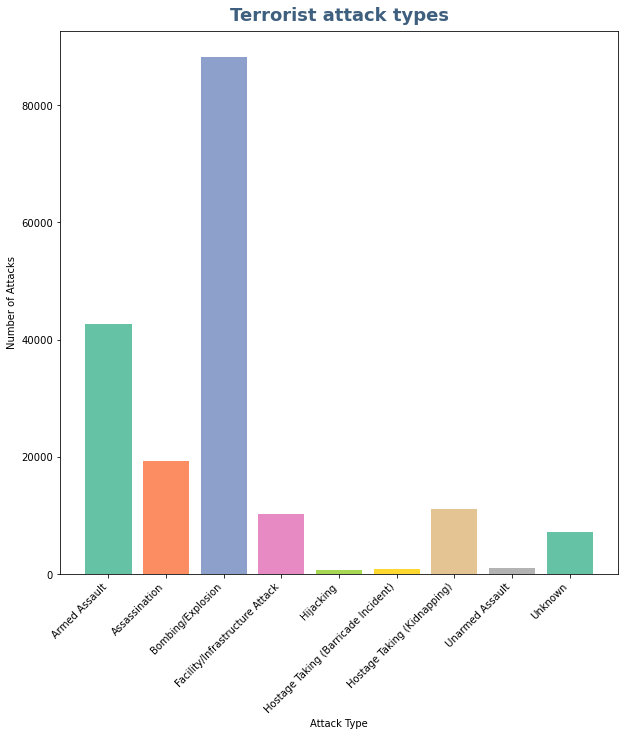

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(attacktype.index, [i[0] for i in attacktype.values], color = sns.color_palette("Set2", 8))
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Number of Attacks', size = 10)
ax.set_xlabel('Attack Type', size = 10)
ax.set_title('Terrorist attack types', fontsize= 18, pad= 10, weight ='bold',color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

## 3. Conclusion
- Year with highest Number of Terror Attacks: 2014 (16903)
- Year with highest Number of Casualties: 2014 (Killed: 44490, Wounded: 41128)
- Country with highest Number of Attacks: Iraq 	(24636)
- Country with highest Number of Casualties: Iraq (Killed: 78589.0, Wounded: 134690.0
- Top Target Nationality: Iraq (Killed: 77057)
- Most common type of Terror attack: Bombing/Explosion (88255 Incidents)